
===== DATASET LOADED SUCCESSFULLY =====
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2     

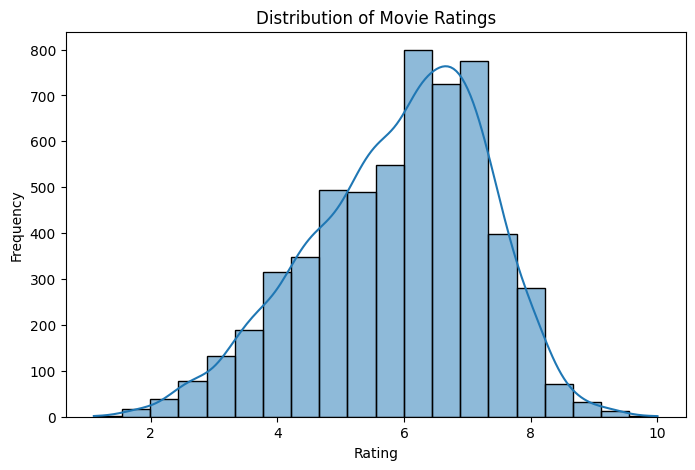

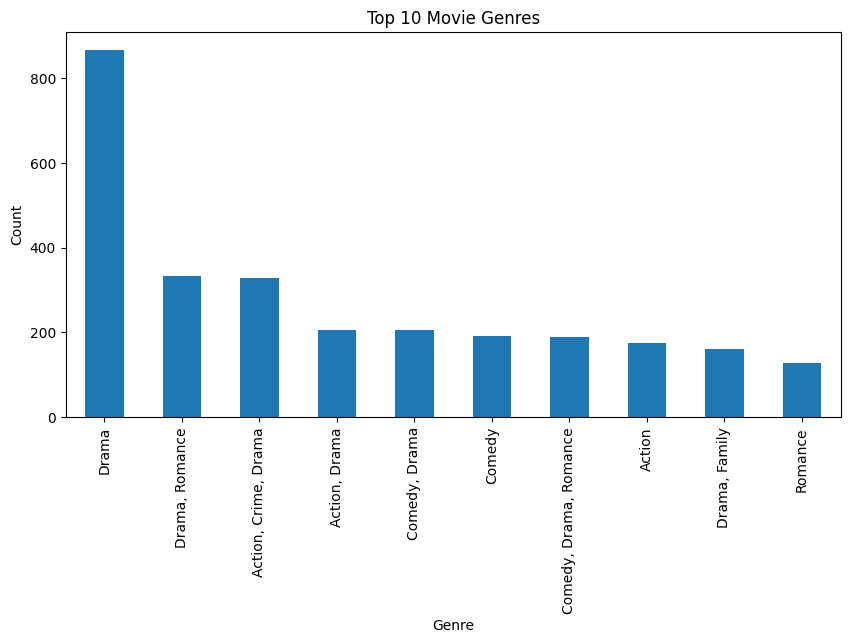

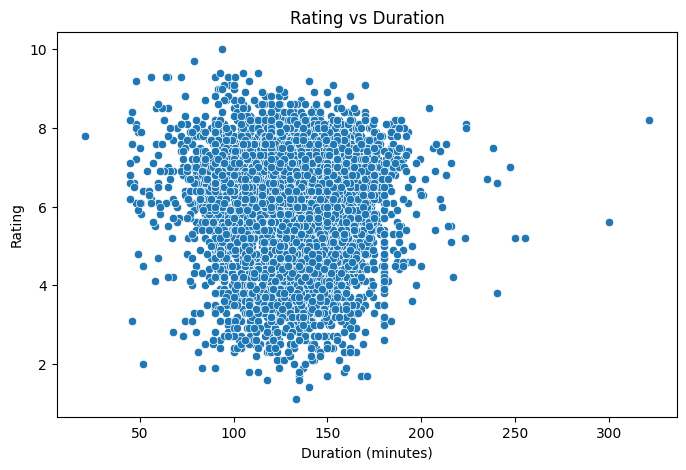


===== FEATURE SELECTION =====
Features Used: ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration']
Target Variable: Rating

Training data size: (4596, 7)
Testing data size: (1150, 7)

===== TRAINING LINEAR REGRESSION MODEL =====

===== TRAINING RANDOM FOREST MODEL =====

===== MODEL EVALUATION: Linear Regression =====
MAE : 2.16
MSE : 8.245
RMSE: 2.871
R²  : -3.606

===== MODEL EVALUATION: Random Forest Regression =====
MAE : 0.927
MSE : 1.415
RMSE: 1.19
R²  : 0.21


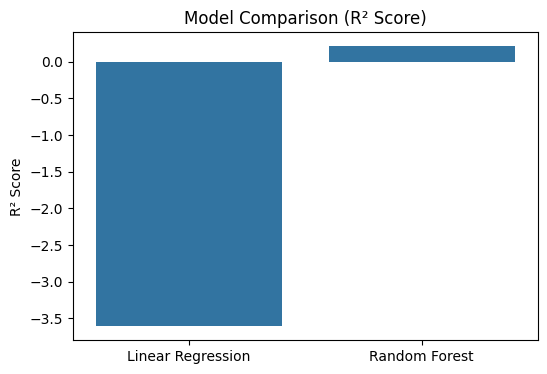


===== NEW MOVIE RATING PREDICTION =====
Predicted IMDb Rating: 6.63

===== FINAL CONCLUSION =====
The Random Forest Regressor outperformed Linear Regression.
It captures complex relationships between genre, director,
actors, and movie duration, achieving higher accuracy.



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# 2. LOAD DATASET
# -----------------------------
file_path = "IMDb Movies India.csv"
df = pd.read_csv(file_path, encoding="latin1")

print("\n===== DATASET LOADED SUCCESSFULLY =====")
print(df.head())

# -----------------------------
# 3. DATASET OVERVIEW
# -----------------------------
print("\n===== DATASET INFORMATION =====")
print(df.info())

print("\n===== STATISTICAL SUMMARY =====")
print(df.describe())

# -----------------------------
# 4. DATA CLEANING
# -----------------------------
print("\n===== DATA CLEANING STARTED =====")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows where Rating is missing
df = df[df["Rating"].notna()]

# Clean Year column
df["Year"] = df["Year"].astype(str)
df["Year"] = df["Year"].str.replace("(", "", regex=False)
df["Year"] = df["Year"].str.replace(")", "", regex=False)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Clean Duration column
df["Duration"] = df["Duration"].astype(str)
df["Duration"] = df["Duration"].str.replace(" min", "", regex=False)
df["Duration"] = pd.to_numeric(df["Duration"], errors="coerce")

# Drop rows with missing important columns
df.dropna(subset=[
    "Genre",
    "Director",
    "Actor 1",
    "Rating",
    "Year",
    "Duration"
], inplace=True)

print("Remaining rows after cleaning:", df.shape[0])

# -----------------------------
# 5. EXPLORATORY DATA ANALYSIS
# -----------------------------
print("\n===== EXPLORATORY DATA ANALYSIS =====")

# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Top genres
top_genres = df["Genre"].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_genres.plot(kind="bar")
plt.title("Top 10 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# Rating vs Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration"], y=df["Rating"])
plt.title("Rating vs Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.show()

# -----------------------------
# 6. FEATURE SELECTION
# -----------------------------
print("\n===== FEATURE SELECTION =====")

features = [
    "Genre",
    "Director",
    "Actor 1",
    "Actor 2",
    "Actor 3",
    "Year",
    "Duration"
]

target = "Rating"

X = df[features]
y = df[target]

print("Features Used:", features)
print("Target Variable:", target)

# -----------------------------
# 7. TRAIN TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("\nTraining data size:", X_train.shape)
print("Testing data size:", X_test.shape)

# -----------------------------
# 8. PREPROCESSING PIPELINE
# -----------------------------
categorical_features = [
    "Genre",
    "Director",
    "Actor 1",
    "Actor 2",
    "Actor 3"
]

numerical_features = [
    "Year",
    "Duration"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

# -----------------------------
# 9. LINEAR REGRESSION MODEL
# -----------------------------
print("\n===== TRAINING LINEAR REGRESSION MODEL =====")

linear_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

linear_model.fit(X_train, y_train)

# -----------------------------
# 10. RANDOM FOREST REGRESSION MODEL
# -----------------------------
print("\n===== TRAINING RANDOM FOREST MODEL =====")

rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

rf_model.fit(X_train, y_train)

# -----------------------------
# 11. MODEL EVALUATION FUNCTION
# -----------------------------
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print("\n===== MODEL EVALUATION:", model_name, "=====")
    print("MAE :", round(mae, 3))
    print("MSE :", round(mse, 3))
    print("RMSE:", round(rmse, 3))
    print("R²  :", round(r2, 3))

# -----------------------------
# 12. EVALUATE BOTH MODELS
# -----------------------------
evaluate_model(linear_model, X_test, y_test, "Linear Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest Regression")

# -----------------------------
# 13. COMPARISON VISUALIZATION
# -----------------------------
models = ["Linear Regression", "Random Forest"]
r2_scores = [
    r2_score(y_test, linear_model.predict(X_test)),
    r2_score(y_test, rf_model.predict(X_test))
]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=r2_scores)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

# -----------------------------
# 14. PREDICTION ON NEW MOVIE
# -----------------------------
print("\n===== NEW MOVIE RATING PREDICTION =====")

new_movie = pd.DataFrame({
    "Genre": ["Drama"],
    "Director": ["Rajkumar Hirani"],
    "Actor 1": ["Aamir Khan"],
    "Actor 2": ["Kareena Kapoor"],
    "Actor 3": ["Boman Irani"],
    "Year": [2014],
    "Duration": [170]
})

predicted_rating = rf_model.predict(new_movie)

print("Predicted IMDb Rating:", round(predicted_rating[0], 2))

# -----------------------------
# 15. FINAL CONCLUSION
# -----------------------------
print("\n===== FINAL CONCLUSION =====")
print(
    "The Random Forest Regressor outperformed Linear Regression.\n"
    "It captures complex relationships between genre, director,\n"
    "actors, and movie duration, achieving higher accuracy.\n"
)
